In [ ]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from pathlib import Path
from MCForecastTools import MCSimulation
from dotenv import load_dotenv

In [ ]:
load_dotenv()

In [46]:
startdate = '2017-01-01'
enddate = '2022-04-01'
polygonkey = os.getenv('POLYGON_API_KEY')
BTC = f"https://api.polygon.io/v2/aggs/ticker/X:BTCUSD/range/1/day/{startdate}/{enddate}?adjusted=true&sort=asc&limit=5000&apiKey={polygonkey}"
ETH = f"https://api.polygon.io/v2/aggs/ticker/X:ETHUSD/range/1/day/{startdate}/{enddate}?adjusted=true&sort=asc&limit=5000&apiKey={polygonkey}"
LTC = f"https://api.polygon.io/v2/aggs/ticker/X:LTCUSD/range/1/day/{startdate}/{enddate}?adjusted=true&sort=asc&limit=5000&apiKey={polygonkey}"
DOGE = f"https://api.polygon.io/v2/aggs/ticker/X:DOGEUSD/range/1/day/{startdate}/{enddate}?adjusted=true&sort=asc&limit=5000&apiKey={polygonkey}"
SOL = f"https://api.polygon.io/v2/aggs/ticker/X:SOLUSD/range/1/day/{startdate}/{enddate}?adjusted=true&sort=asc&limit=5000&apiKey={polygonkey}"
DOT = f"https://api.polygon.io/v2/aggs/ticker/X:DOTUSD/range/1/day/{startdate}/{enddate}?adjusted=true&sort=asc&limit=5000&apiKey={polygonkey}"
BNB = f"https://api.polygon.io/v2/aggs/ticker/X:BNBUSD/range/1/day/{startdate}/{enddate}?adjusted=true&sort=asc&limit=5000&apiKey={polygonkey}"
UNI = f"https://api.polygon.io/v2/aggs/ticker/X:UNIUSD/range/1/day/{startdate}/{enddate}?adjusted=true&sort=asc&limit=5000&apiKey={polygonkey}"

In [47]:
url_list = [BTC, ETH, LTC, DOGE, SOL, DOT, BNB, UNI]

In [50]:
#function that accepts a variable string URL for pulling the json response file from polygon
def polygonurl(coinurl):
        response = requests.get(coinurl).json()
        return response

#function for turning the json file into the dataframe with required columns
def jsontodf(json):
        df = pd.json_normalize(json, record_path =['results'],
        meta =['ticker']
        )
        raw_data = pd.DataFrame(columns= ["t", "o", "h", "l", "c", "v", "n", "vw", "ticker"])
        df = pd.concat([raw_data, df])
        return df

#function for structuring dataframe so MCsimulation will accept as input
def structuredata(df, counter):
        df.columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'trade_count', 'vwap', 'symbol']
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
        df = df.set_index('timestamp')
        coin = f'{df["symbol"].iloc[0]}'
        col_names = [(coin, x) for x in df.columns]
        df.columns = pd.MultiIndex.from_tuples(col_names)
        return df


#function for saving an invidiual coin data as .csv, not currently being used
def savetocsv(df):
        filename = f'{df["symbol"].iloc[0]}'
        print(filename)
        filepath = Path(f'{filename} + ".csv"')
        df.to_csv(filepath)

#function to merge two dfs into MCsimulation format
def merger(df1, df2):
        df_merged = pd.merge(df1, df2, how = "inner", left_index=True, right_index=True)
        return df_merged


#run function that accepts a list of urls defined other variables needed for structuring the combined data
def run(list, currentdf, counter):
        if(list.index(counter) == 0):
                response = polygonurl(i)
                df = jsontodf(response)
                df = structuredata(df, counter)
                #display(df.head())
                #print('hi')
                return df
        else:        
                response = polygonurl(i)
                df = jsontodf(response)
                df = structuredata(df, counter)
                df = merger(currentdf, df)
                #display(df.head())
                #print('ho')
                return df



In [49]:
#cell for executing the data compiling functions

MCdf = pd.DataFrame()

#looping through the urls to build MCsimulation dataframe input
for i in url_list:
        MCdf = run(url_list, MCdf, i)

display(MCdf.head())

X:BTCUSD                                                      \
               open    high     low    close         volume trade_count   
timestamp                                                                 
2017-01-01   973.37  1010.0  959.71   992.97   26200.595828       27151   
2017-01-02   992.96  1038.0  990.01  1012.12   40008.874838       45247   
2017-01-03  1011.44  1040.0  999.99  1020.67   33464.680522       44586   
2017-01-04  1020.69  1150.0  997.23  1132.00   97090.699360       82201   
2017-01-05  1114.35  1175.0  850.79  1006.99  156146.155334      122654   

                                 
                 vwap    symbol  
timestamp                        
2017-01-01   988.3956  X:BTCUSD  
2017-01-02  1016.0714  X:BTCUSD  
2017-01-03  1022.8452  X:BTCUSD  
2017-01-04  1093.8897  X:BTCUSD  
2017-01-05  1013.2968  X:BTCUSD

X:BTCUSD                                                      \
               open    high     low    close         volume trade_count   
timestamp                                                                 
2017-01-01   973.37  1010.0  959.71   992.97   26200.595828       27151   
2017-01-02   992.96  1038.0  990.01  1012.12   40008.874838       45247   
2017-01-03  1011.44  1040.0  999.99  1020.67   33464.680522       44586   
2017-01-04  1020.69  1150.0  997.23  1132.00   97090.699360       82201   
2017-01-05  1114.35  1175.0  850.79  1006.99  156146.155334      122654   

                                X:ETHUSD                            \
                 vwap    symbol     open      high   low     close   
timestamp                                                            
2017-01-01   988.3956  X:BTCUSD     8.16   8.60000  8.03   8.19000   
2017-01-02  1016.0714  X:BTCUSD     8.20   8.53000  8.05   8.38000   
2017-01-03  1022.8452  X:BTCUSD     8.38  10.09948  8.24   9.59000   
2017-01-04  1093.8897  X:BTCUSD     9.62  11.17000  9.34  11.16000   
2017-01-05  1013.2968  X:BTCUSD    11.13  11.80000  9.08  10.31859   

                                                          
                   volume trade_count     vwap    symbol  
timestamp                                                 
2017-01-01  138183.850802        7342   8.3060  X:ETHUSD  
2017-01-02  124362.400054       10233   8.2736  X:ETHUSD  
2017-01-03  454564.002304       23148   9.3451  X:ETHUSD  
2017-01-04  541714.004875       30961  10.5577  X:ETHUSD  
2017-01-05  727743.015608       71049  10.5102  X:ETHUSD

X:BTCUSD                                                      \
               open    high     low    close         volume trade_count   
timestamp                                                                 
2017-01-01   973.37  1010.0  959.71   992.97   26200.595828       27151   
2017-01-02   992.96  1038.0  990.01  1012.12   40008.874838       45247   
2017-01-03  1011.44  1040.0  999.99  1020.67   33464.680522       44586   
2017-01-04  1020.69  1150.0  997.23  1132.00   97090.699360       82201   
2017-01-05  1114.35  1175.0  850.79  1006.99  156146.155334      122654   

                                X:ETHUSD            ...                     \
                 vwap    symbol     open      high  ...     vwap    symbol   
timestamp                                           ...                      
2017-01-01   988.3956  X:BTCUSD     8.16   8.60000  ...   8.3060  X:ETHUSD   
2017-01-02  1016.0714  X:BTCUSD     8.20   8.53000  ...   8.2736  X:ETHUSD   
2017-01-03  1022.8452  X:BTCUSD     8.38  10.09948  ...   9.3451  X:ETHUSD   
2017-01-04  1093.8897  X:BTCUSD     9.62  11.17000  ...  10.5577  X:ETHUSD   
2017-01-05  1013.2968  X:BTCUSD    11.13  11.80000  ...  10.5102  X:ETHUSD   

           X:LTCUSD                                                            \
               open  high      low   close         volume trade_count    vwap   
timestamp                                                                       
2017-01-01   4.3636  4.57  4.09999  4.4997   15309.569057         588  4.4616   
2017-01-02   4.5000  4.90  4.39161  4.5800   49640.520029        1610  4.6068   
2017-01-03   4.5600  4.75  4.40000  4.5400   21866.604246         959  4.5361   
2017-01-04   4.5995  5.99  4.41100  4.6200   55530.049065        2451  4.6314   
2017-01-05   4.6596  4.88  3.88000  4.2153  112285.033200        4425  4.3704   

                      
              symbol  
timestamp             
2017-01-01  X:LTCUSD  
2017-01-02  X:LTCUSD  
2017-01-03  X:LTCUSD  
2017-01-04  X:LTCUSD  
2017-01-05  X:LTCUSD  

[5 rows x 24 columns]

X:BTCUSD                                                        \
                  open     high      low     close        volume trade_count   
timestamp                                                                      
2017-06-01  2291.30100  2488.00  2187.30  2419.970  69420.718110      129661   
2017-06-02  2399.98100  2497.65  2262.80  2487.183  44987.205383       88599   
2017-06-03  2485.43199  2599.00  2345.13  2540.940  40589.062528       79110   
2017-06-04  2461.60000  2570.00  2361.98  2488.200  40387.407597       84345   
2017-06-05  2488.20000  2699.35  2472.86  2636.900  47852.020010       86416   

                                  X:ETHUSD          ... X:LTCUSD            \
                 vwap    symbol       open    high  ...     vwap    symbol   
timestamp                                           ...                      
2017-06-01  2364.6363  X:BTCUSD  229.30000  238.97  ...  27.3370  X:LTCUSD   
2017-06-02  2399.0935  X:BTCUSD  219.48722  229.75  ...  27.4847  X:LTCUSD   
2017-06-03  2501.3809  X:BTCUSD  221.85000  227.50  ...  27.3889  X:LTCUSD   
2017-06-04  2497.4433  X:BTCUSD  224.95000  249.99  ...  27.1660  X:LTCUSD   
2017-06-05  2591.2575  X:BTCUSD  245.48000  250.00  ...  29.6753  X:LTCUSD   

           X:DOGEUSD                                                       \
                open      high       low     close     volume trade_count   
timestamp                                                                   
2017-06-01  0.000100  0.000100  0.000100  0.000100      380.0           1   
2017-06-02  0.120999  0.200000  0.000124  0.002803   123520.0          78   
2017-06-03  0.002775  0.003398  0.002655  0.003213  1248350.0         425   
2017-06-04  0.003242  0.003770  0.002544  0.003770  1703760.0         556   
2017-06-05  0.003223  0.003825  0.002923  0.003718  1378090.0         455   

                               
              vwap     symbol  
timestamp                      
2017-06-01  0.0001  X:DOGEUSD  
2017-06-02  0.0029  X:DOGEUSD  
2017-06-03  0.0028  X:DOGEUSD  
2017-06-04  0.0031  X:DOGEUSD  
2017-06-05  0.0033  X:DOGEUSD  

[5 rows x 32 columns]

X:BTCUSD                                                          \
                open      high       low     close        volume trade_count   
timestamp                                                                      
2021-02-25  49715.13  52189.00  46700.00  47061.50  71922.492300      905054   
2021-02-26  47052.15  48476.62  44027.00  46326.20  96573.177573     1265989   
2021-02-27  46324.15  48407.00  45010.01  46180.75  50921.437398      723399   
2021-02-28  46169.92  46706.20  43006.77  45231.75  67089.121753      938881   
2021-03-01  45231.74  49831.52  44959.00  49580.00  72800.384658      899784   

                                 X:ETHUSD           ... X:DOGEUSD             \
                  vwap    symbol     open     high  ...      vwap     symbol   
timestamp                                           ...                        
2021-02-25  49836.1274  X:BTCUSD  1625.27  1672.91  ...    0.0546  X:DOGEUSD   
2021-02-26  46486.5443  X:BTCUSD  1485.30  1564.11  ...    0.0505  X:DOGEUSD   
2021-02-27  46977.6301  X:BTCUSD  1445.21  1527.70  ...    0.0505  X:DOGEUSD   
2021-02-28  44634.3352  X:BTCUSD  1460.49  1471.30  ...    0.0479  X:DOGEUSD   
2021-03-01  47779.4633  X:BTCUSD  1424.40  1574.28  ...    0.0496  X:DOGEUSD   

           X:SOLUSD                                                     \
               open    high     low   close         volume trade_count   
timestamp                                                                
2021-02-25   24.600  24.600  13.821  13.823   70884.293321        1365   
2021-02-26   13.854  15.404  13.167  13.612  131414.366460        1876   
2021-02-27   13.590  14.691  13.118  13.197  197922.439303        2556   
2021-02-28   13.179  13.741  11.556  13.096  210657.643105        2726   
2021-03-01   13.109  16.890  13.098  14.992  182168.995161        2877   

                               
               vwap    symbol  
timestamp                      
2021-02-25  15.6757  X:SOLUSD  
2021-02-26  14.0204  X:SOLUSD  
2021-02-27  13.8649  X:SOLUSD  
2021-02-28  12.5544  X:SOLUSD  
2021-03-01  14.3785  X:SOLUSD  

[5 rows x 40 columns]

X:BTCUSD                                                          \
                open      high       low     close        volume trade_count   
timestamp                                                                      
2021-02-25  49715.13  52189.00  46700.00  47061.50  71922.492300      905054   
2021-02-26  47052.15  48476.62  44027.00  46326.20  96573.177573     1265989   
2021-02-27  46324.15  48407.00  45010.01  46180.75  50921.437398      723399   
2021-02-28  46169.92  46706.20  43006.77  45231.75  67089.121753      938881   
2021-03-01  45231.74  49831.52  44959.00  49580.00  72800.384658      899784   

                                 X:ETHUSD           ... X:SOLUSD            \
                  vwap    symbol     open     high  ...     vwap    symbol   
timestamp                                           ...                      
2021-02-25  49836.1274  X:BTCUSD  1625.27  1672.91  ...  15.6757  X:SOLUSD   
2021-02-26  46486.5443  X:BTCUSD  1485.30  1564.11  ...  14.0204  X:SOLUSD   
2021-02-27  46977.6301  X:BTCUSD  1445.21  1527.70  ...  13.8649  X:SOLUSD   
2021-02-28  44634.3352  X:BTCUSD  1460.49  1471.30  ...  12.5544  X:SOLUSD   
2021-03-01  47779.4633  X:BTCUSD  1424.40  1574.28  ...  14.3785  X:SOLUSD   

           X:DOTUSD                                                     \
               open    high     low   close         volume trade_count   
timestamp                                                                
2021-02-25   33.706  35.236  30.936  31.251  362370.534741       12841   
2021-02-26   31.256  33.503  27.967  31.416  926442.918177       22309   
2021-02-27   31.466  35.636  31.362  33.528  641944.991014       17698   
2021-02-28   33.539  34.649  29.818  33.785  767921.504682       19869   
2021-03-01   33.919  35.647  33.109  35.634  250704.949515        9330   

                               
               vwap    symbol  
timestamp                      
2021-02-25  33.3515  X:DOTUSD  
2021-02-26  30.5285  X:DOTUSD  
2021-02-27  33.9514  X:DOTUSD  
2021-02-28  31.8474  X:DOTUSD  
2021-03-01  34.4905  X:DOTUSD  

[5 rows x 48 columns]

X:BTCUSD                                                          \
                open      high       low     close        volume trade_count   
timestamp                                                                      
2021-02-25  49715.13  52189.00  46700.00  47061.50  71922.492300      905054   
2021-02-26  47052.15  48476.62  44027.00  46326.20  96573.177573     1265989   
2021-02-27  46324.15  48407.00  45010.01  46180.75  50921.437398      723399   
2021-02-28  46169.92  46706.20  43006.77  45231.75  67089.121753      938881   
2021-03-01  45231.74  49831.52  44959.00  49580.00  72800.384658      899784   

                                 X:ETHUSD           ... X:DOTUSD            \
                  vwap    symbol     open     high  ...     vwap    symbol   
timestamp                                           ...                      
2021-02-25  49836.1274  X:BTCUSD  1625.27  1672.91  ...  33.3515  X:DOTUSD   
2021-02-26  46486.5443  X:BTCUSD  1485.30  1564.11  ...  30.5285  X:DOTUSD   
2021-02-27  46977.6301  X:BTCUSD  1445.21  1527.70  ...  33.9514  X:DOTUSD   
2021-02-28  44634.3352  X:BTCUSD  1460.49  1471.30  ...  31.8474  X:DOTUSD   
2021-03-01  47779.4633  X:BTCUSD  1424.40  1574.28  ...  34.4905  X:DOTUSD   

             X:BNBUSD                                                         \
                 open       high        low      close    volume trade_count   
timestamp                                                                      
2021-02-25  253.68612  265.49327  231.47602  234.86768  10483.03        2492   
2021-02-26  232.70536  239.18656  209.20505  221.56359   8372.07        2286   
2021-02-27  220.98683  237.47698  219.59568  226.17561   2571.49        1023   
2021-02-28  223.03053  228.82947  195.07435  208.26014   4412.87        1566   
2021-03-01  212.70464  259.58667  210.50142  254.70146  10783.36        3112   

                                
                vwap    symbol  
timestamp                       
2021-02-25  250.4010  X:BNBUSD  
2021-02-26  226.0623  X:BNBUSD  
2021-02-27  227.5862  X:BNBUSD  
2021-02-28  208.0818  X:BNBUSD  
2021-03-01  244.4322  X:BNBUSD  

[5 rows x 56 columns]

X:BTCUSD                                                          \
                open      high       low     close        volume trade_count   
timestamp                                                                      
2021-02-25  49715.13  52189.00  46700.00  47061.50  71922.492300      905054   
2021-02-26  47052.15  48476.62  44027.00  46326.20  96573.177573     1265989   
2021-02-27  46324.15  48407.00  45010.01  46180.75  50921.437398      723399   
2021-02-28  46169.92  46706.20  43006.77  45231.75  67089.121753      938881   
2021-03-01  45231.74  49831.52  44959.00  49580.00  72800.384658      899784   

                                 X:ETHUSD           ...  X:BNBUSD            \
                  vwap    symbol     open     high  ...      vwap    symbol   
timestamp                                           ...                       
2021-02-25  49836.1274  X:BTCUSD  1625.27  1672.91  ...  250.4010  X:BNBUSD   
2021-02-26  46486.5443  X:BTCUSD  1485.30  1564.11  ...  226.0623  X:BNBUSD   
2021-02-27  46977.6301  X:BTCUSD  1445.21  1527.70  ...  227.5862  X:BNBUSD   
2021-02-28  44634.3352  X:BTCUSD  1460.49  1471.30  ...  208.0818  X:BNBUSD   
2021-03-01  47779.4633  X:BTCUSD  1424.40  1574.28  ...  244.4322  X:BNBUSD   

           X:UNIUSD                                                       \
               open     high      low    close        volume trade_count   
timestamp                                                                  
2021-02-25  25.2638  26.9439  23.1001  23.5016  2.597023e+06       90760   
2021-02-26  23.4899  25.2281  20.9910  23.1103  3.540339e+06      102544   
2021-02-27  23.1170  24.8262  22.3372  23.5650  2.058413e+06       75973   
2021-02-28  23.5649  24.1660  20.5000  22.2640  3.173062e+06       87047   
2021-03-01  22.2639  25.7575  22.1021  25.7131  1.922369e+06       66963   

                               
               vwap    symbol  
timestamp                      
2021-02-25  24.9932  X:UNIUSD  
2021-02-26  22.9403  X:UNIUSD  
2021-02-27  23.8425  X:UNIUSD  
2021-02-28  21.9411  X:UNIUSD  
2021-03-01  23.8336  X:UNIUSD  

[5 rows x 64 columns]

X:BTCUSD                                                          \
                open      high       low     close        volume trade_count   
timestamp                                                                      
2021-02-25  49715.13  52189.00  46700.00  47061.50  71922.492300      905054   
2021-02-26  47052.15  48476.62  44027.00  46326.20  96573.177573     1265989   
2021-02-27  46324.15  48407.00  45010.01  46180.75  50921.437398      723399   
2021-02-28  46169.92  46706.20  43006.77  45231.75  67089.121753      938881   
2021-03-01  45231.74  49831.52  44959.00  49580.00  72800.384658      899784   

                                 X:ETHUSD           ...  X:BNBUSD            \
                  vwap    symbol     open     high  ...      vwap    symbol   
timestamp                                           ...                       
2021-02-25  49836.1274  X:BTCUSD  1625.27  1672.91  ...  250.4010  X:BNBUSD   
2021-02-26  46486.5443  X:BTCUSD  1485.30  1564.11  ...  226.0623  X:BNBUSD   
2021-02-27  46977.6301  X:BTCUSD  1445.21  1527.70  ...  227.5862  X:BNBUSD   
2021-02-28  44634.3352  X:BTCUSD  1460.49  1471.30  ...  208.0818  X:BNBUSD   
2021-03-01  47779.4633  X:BTCUSD  1424.40  1574.28  ...  244.4322  X:BNBUSD   

           X:UNIUSD                                                       \
               open     high      low    close        volume trade_count   
timestamp                                                                  
2021-02-25  25.2638  26.9439  23.1001  23.5016  2.597023e+06       90760   
2021-02-26  23.4899  25.2281  20.9910  23.1103  3.540339e+06      102544   
2021-02-27  23.1170  24.8262  22.3372  23.5650  2.058413e+06       75973   
2021-02-28  23.5649  24.1660  20.5000  22.2640  3.173062e+06       87047   
2021-03-01  22.2639  25.7575  22.1021  25.7131  1.922369e+06       66963   

                               
               vwap    symbol  
timestamp                      
2021-02-25  24.9932  X:UNIUSD  
2021-02-26  22.9403  X:UNIUSD  
2021-02-27  23.8425  X:UNIUSD  
2021-02-28  21.9411  X:UNIUSD  
2021-03-01  23.8336  X:UNIUSD  

[5 rows x 64 columns]

In [51]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights can be split in any fashion between tickers [BTC, ETH, LTC, DOGE, SOL, DOT, BNB, UNI]
# Run 500 samples.
MC_equal_weight = MCSimulation(
    portfolio_data = MCdf,
    weights = [.2, .15, .15, .1, .1, .1, .1, .1],
    num_simulation = 500,
    num_trading_days = 365*10
)

# Review the simulation input data
# Printing the first five rows of the simulation input data
MC_equal_weight.portfolio_data.head()

X:BTCUSD                                                          \
                open      high       low     close        volume trade_count   
timestamp                                                                      
2021-02-25  49715.13  52189.00  46700.00  47061.50  71922.492300      905054   
2021-02-26  47052.15  48476.62  44027.00  46326.20  96573.177573     1265989   
2021-02-27  46324.15  48407.00  45010.01  46180.75  50921.437398      723399   
2021-02-28  46169.92  46706.20  43006.77  45231.75  67089.121753      938881   
2021-03-01  45231.74  49831.52  44959.00  49580.00  72800.384658      899784   

                                              X:ETHUSD  ...     X:BNBUSD  \
                  vwap    symbol daily_return     open  ... daily_return   
timestamp                                               ...                
2021-02-25  49836.1274  X:BTCUSD          NaN  1625.27  ...          NaN   
2021-02-26  46486.5443  X:BTCUSD    -0.015624  1485.30  ...    -0.056645   
2021-02-27  46977.6301  X:BTCUSD    -0.003140  1445.21  ...     0.020816   
2021-02-28  44634.3352  X:BTCUSD    -0.020550  1460.49  ...    -0.079210   
2021-03-01  47779.4633  X:BTCUSD     0.096133  1424.40  ...     0.222997   

           X:UNIUSD                                                       \
               open     high      low    close        volume trade_count   
timestamp                                                                  
2021-02-25  25.2638  26.9439  23.1001  23.5016  2.597023e+06       90760   
2021-02-26  23.4899  25.2281  20.9910  23.1103  3.540339e+06      102544   
2021-02-27  23.1170  24.8262  22.3372  23.5650  2.058413e+06       75973   
2021-02-28  23.5649  24.1660  20.5000  22.2640  3.173062e+06       87047   
2021-03-01  22.2639  25.7575  22.1021  25.7131  1.922369e+06       66963   

                                            
               vwap    symbol daily_return  
timestamp                                   
2021-02-25  24.9932  X:UNIUSD          NaN  
2021-02-26  22.9403  X:UNIUSD    -0.016650  
2021-02-27  23.8425  X:UNIUSD     0.019675  
2021-02-28  21.9411  X:UNIUSD    -0.055209  
2021-03-01  23.8336  X:UNIUSD     0.154918  

[5 rows x 72 columns]

In [52]:
MC_equal_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\gitrepo\Project-1\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,1.033182e+00,9.827721e-01,1.041154e+00,1.078819e+00,9.476080e-01,9.747999e-01,1.055135e+00,1.104360e+00,1.017708e+00,1.016568e+00,...,1.013496e+00,9.808728e-01,1.003298e+00,9.938549e-01,1.036298e+00,1.080026e+00,1.068232e+00,9.655840e-01,9.331446e-01,1.086080e+00
2,1.046895e+00,1.054996e+00,1.071210e+00,1.130980e+00,9.841797e-01,1.008165e+00,1.070637e+00,1.175470e+00,1.116923e+00,1.035116e+00,...,1.093392e+00,9.927654e-01,1.000562e+00,9.749497e-01,1.054224e+00,1.144619e+00,1.025583e+00,9.026014e-01,9.379588e-01,1.205898e+00
3,1.118136e+00,1.141461e+00,1.160211e+00,1.042809e+00,9.168649e-01,1.046857e+00,1.073416e+00,1.195347e+00,1.123814e+00,1.021720e+00,...,1.096090e+00,1.063651e+00,1.024115e+00,1.000152e+00,1.154767e+00,1.168915e+00,1.057657e+00,9.516113e-01,9.761599e-01,1.237056e+00
4,1.168289e+00,1.206611e+00,1.210201e+00,9.708105e-01,1.020429e+00,1.014337e+00,9.896286e-01,1.277855e+00,1.198958e+00,9.805003e-01,...,1.151634e+00,1.098740e+00,1.072517e+00,1.068664e+00,1.220639e+00,1.129169e+00,1.104752e+00,9.647913e-01,1.033060e+00,1.197807e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3646,3.776979e+18,8.365777e+17,1.291671e+19,2.132093e+18,1.105249e+19,6.116459e+19,4.479780e+18,4.782360e+20,2.822487e+19,1.694148e+19,...,6.472469e+18,4.296698e+19,2.965152e+18,9.380005e+19,3.054819e+20,2.505155e+20,4.800147e+18,1.882544e+18,1.955132e+20,3.724757e+17
3647,3.641193e+18,8.881387e+17,1.294600e+19,1.928009e+18,1.108686e+19,6.561526e+19,4.499665e+18,5.153364e+20,2.803021e+19,1.632086e+19,...,6.654589e+18,4.681461e+19,3.068082e+18,9.414961e+19,3.173443e+20,2.616890e+20,5.042118e+18,1.851767e+18,1.898730e+20,4.058494e+17
3648,3.708604e+18,9.269974e+17,1.413875e+19,1.915545e+18,1.159230e+19,6.897709e+19,4.447046e+18,5.093892e+20,2.686067e+19,1.708205e+19,...,6.577895e+18,4.486771e+19,2.789844e+18,9.796450e+19,3.308040e+20,2.633852e+20,5.142087e+18,1.703812e+18,1.973284e+20,3.972046e+17
3649,3.595562e+18,9.371038e+17,1.435277e+19,1.984596e+18,1.202176e+19,7.002485e+19,4.241251e+18,5.044077e+20,2.595519e+19,1.774178e+19,...,6.617559e+18,4.418290e+19,2.780421e+18,1.034510e+20,3.265095e+20,2.696852e+20,5.105221e+18,1.716602e+18,1.979870e+20,4.031428e+17


count           5.000000e+02
mean            2.157882e+20
std             1.118597e+21
min             1.249801e+15
25%             1.466856e+18
50%             1.193678e+19
75%             7.424710e+19
max             1.693220e+22
95% CI Lower    2.066636e+16
95% CI Upper    1.776012e+21
Name: 3650, dtype: float64


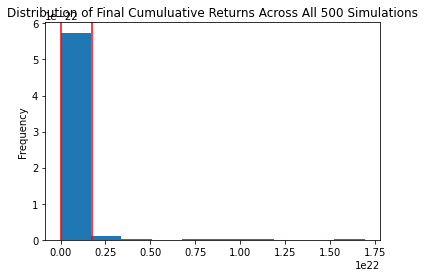

In [53]:
#MC_equal_weight_plot = MC_6040_weight.plot_simulation()
MC_equal_weight_dist = MC_equal_weight.plot_distribution()
MC_summary_stats = MC_equal_weight.summarize_cumulative_return()
print(MC_summary_stats)

In [56]:
# Using the lower and upper `95%` confidence intervals from the summary statistics,
# calculate the range of the probable cumulative returns for a $500000 investment
ci_95_lower_cumulative_return = MC_summary_stats[8] * 500000
ci_95_upper_cumulative_return = MC_summary_stats[9] * 500000

print(f"There is a 95% chance that an initial investment of $500,000 in the portfolio"
    f" over the next 15 years will end within in the range of"
    f" ${ci_95_lower_cumulative_return: .2f} and ${ci_95_upper_cumulative_return: .2f}.")

There is a 95% chance that an initial investment of $500,000 in the portfolio over the next 15 years will end within in the range of $ 10333180133741621673984.00 and $ 888005973076262989653344256.00.


In [55]:
"""
Although this result presents potentially fantastic news, it’s important to note that these five-year forecasted return values are based on only three years of historical price data. The five-year forecast simulates more variability than the data that the simulation is based on includes. In general, it’s ideal to supply one year of historical data for each year of simulated data.

If we simulate using only small amounts of data during a recent time when markets are booming, or instead falling precipitously, a Monte-Carlo Analysis will inadvertently extrapolate this temporary market movement too far into the future. Getting data over a longer time period mitigates this effect. Due to the limitations of the Alpaca API, however, we can typically produce just three full years of historical data.
"""

'\nAlthough this result presents potentially fantastic news, it’s important to note that these five-year forecasted return values are based on only three years of historical price data. The five-year forecast simulates more variability than the data that the simulation is based on includes. In general, it’s ideal to supply one year of historical data for each year of simulated data.\n\nIf we simulate using only small amounts of data during a recent time when markets are booming, or instead falling precipitously, a Monte-Carlo Analysis will inadvertently extrapolate this temporary market movement too far into the future. Getting data over a longer time period mitigates this effect. Due to the limitations of the Alpaca API, however, we can typically produce just three full years of historical data.\n'